## Partial Dependence Plots
feature importance는 예측에 가장 영향을 미치는 변수를 나타내지만 partial dependence plot에서는 feature가 예측에 어떤 영향을 미치는지 보여준다.<br>
다음과 같은 질문에 유용하다 :
- 경도와 위도는 주택 가격에 어떤 영향을 미치는지. 비슷한 크기의 주택들이 다른 지역에서 어떻게 가격이 매겨질 것인지
- 예측된 두 그룹 간의 건강 차이는 식단때문인지 아니면 다른 요인인지

## How it Works
permutation importance와 같이, ***partial dependence plots은 모델이 학습된 후에 계산된다.*** 모델은 어떤 식으로든 인위적으로 조작되지 않은 실제 데이터에 적합하다.
<br><br>
축구를 예를 들어, 각각의 팀들은 여러 면에서 다를 수 있다. 패스를 몇 번 했는지, 슛을 얼마나 했는지, 골을 얼마나 넣었는지 등. 언뜻 보기에 이러한 features의 효과를 분리하는 것은 어려워 보인다. <br><br>
partial plot이 각 feature의 효과를 구분하는 방법을 확인하기 위해 먼저 데이터 행을 하나 고려하는 것으로 시작한다. 예를 들어 이 데이터 행은 공을 50% 점유했고, 100개의 패스를 하고, 10개의 슛을 하고 1개의 골을 넣은 팀을 나타낼 수 있다. <br><br>
우리는 학습된 모델을 사용해서 결과를 예측한다. 하지만 우리는 series의 예측을 위해 변수 하나의 값을 반복적으로 변경한다.

## Code Example

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')

y = (data['Man of the Match'] == 'Yes')

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

In [17]:
train_X.shape

(96, 18)

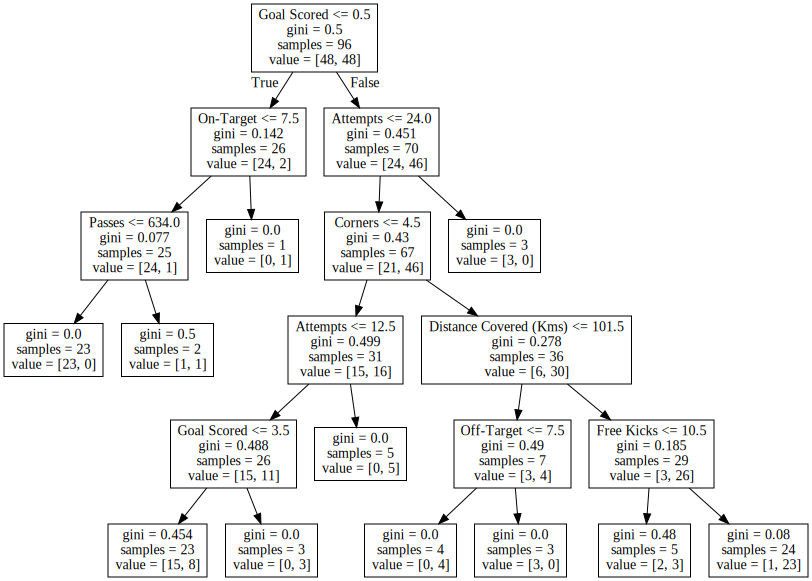

In [15]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [40]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

AttributeError: module 'pdp' has no attribute 'pdp_isolate'

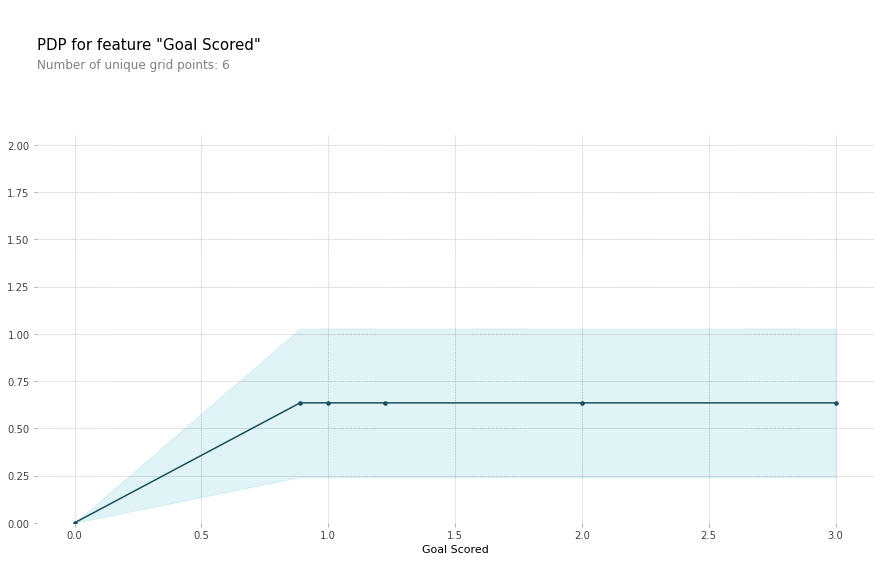

In [ ]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

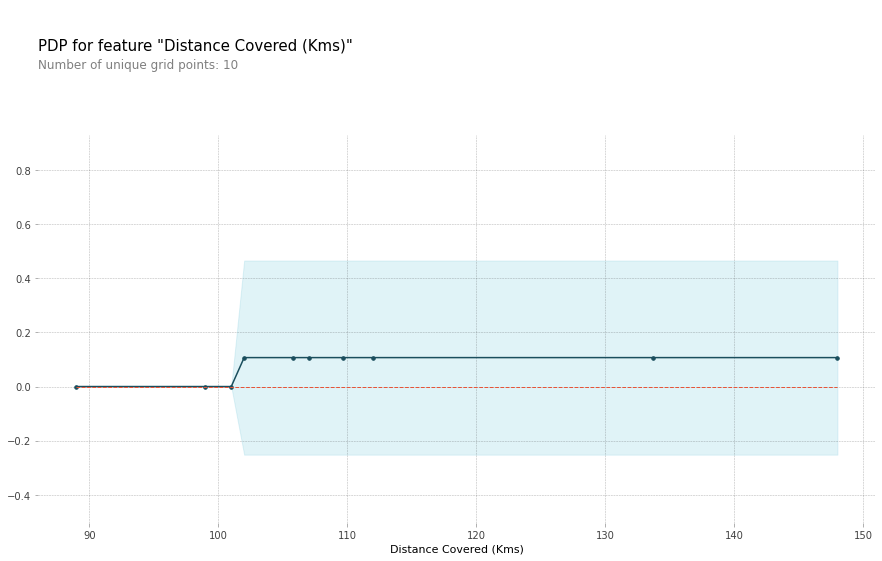

In [ ]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

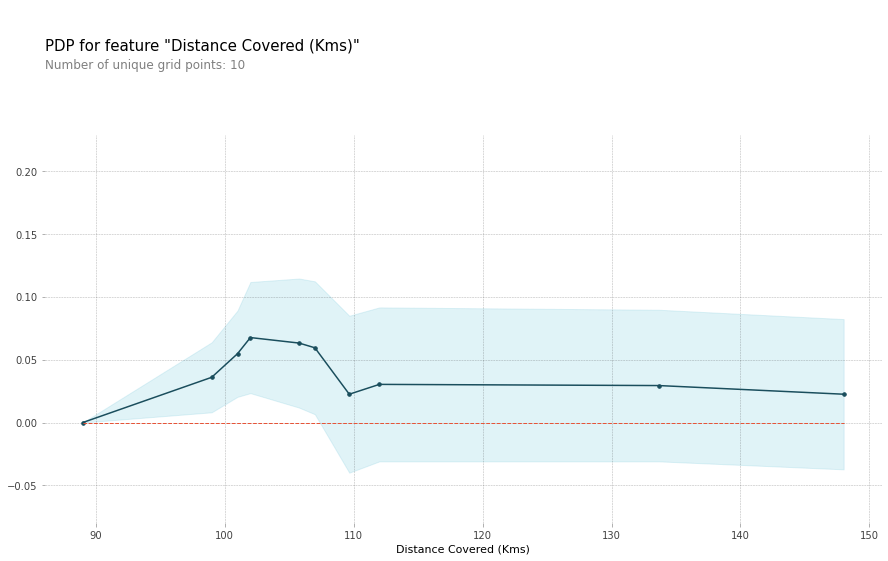

## 2D Partial Dependence Plots

In [ ]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

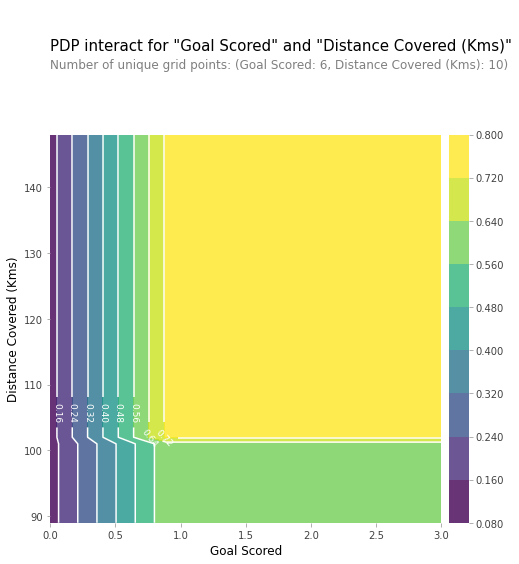